In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_dir = "/content/drive/My Drive/NIT-Trichy/"
# dataset_file = f"{main_dir}data.txt"
# dataset_file = f"{main_dir}simulated_csv.csv"
dataset_file = f"{main_dir}navalplantmaintenance.csv"
df = pd.read_csv(dataset_file,delim_whitespace=True, header=None)
# df = pd.read_csv(dataset_file)

<ipython-input-67-ef76d475dd5d>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(dataset_file,delim_whitespace=True, header=None)


In [ ]:
col_names = ['Lever position','Ship speed', 'Gas Turbine shaft torque', 'Gas Turbine rate of revolutions', 'Gas Generator rate of revolutions', 'Starboard Propeller Torque', 'Port Propeller Torque',\
             'HP Turbine exit temperature', 'GT Compressor inlet air temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure', 'GT Compressor inlet air pressure', 'GT Compressor outlet air pressure',\
             'Gas Turbine exhaust gas pressure', 'Turbine Injecton Control', 'Fuel flow', 'GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']
# GT => Gas Turbine
df.columns = col_names
df.head()

,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
100*df.isna().sum()/len(df)
# Implies no missing value!
df = df.dropna()
df.head()

,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
# Min Max of GT compressor inlet air temperature & pressure are same, we can drop the 2 columns:

df = df.drop([ 'GT Compressor decay state coefficient', 'GT Turbine decay state coefficient'],axis=1)
# df.head()
print(df.shape)

(11934, 16)


In [ ]:
df.to_csv('naval_plant_maintenance.csv',index=False,header=False)

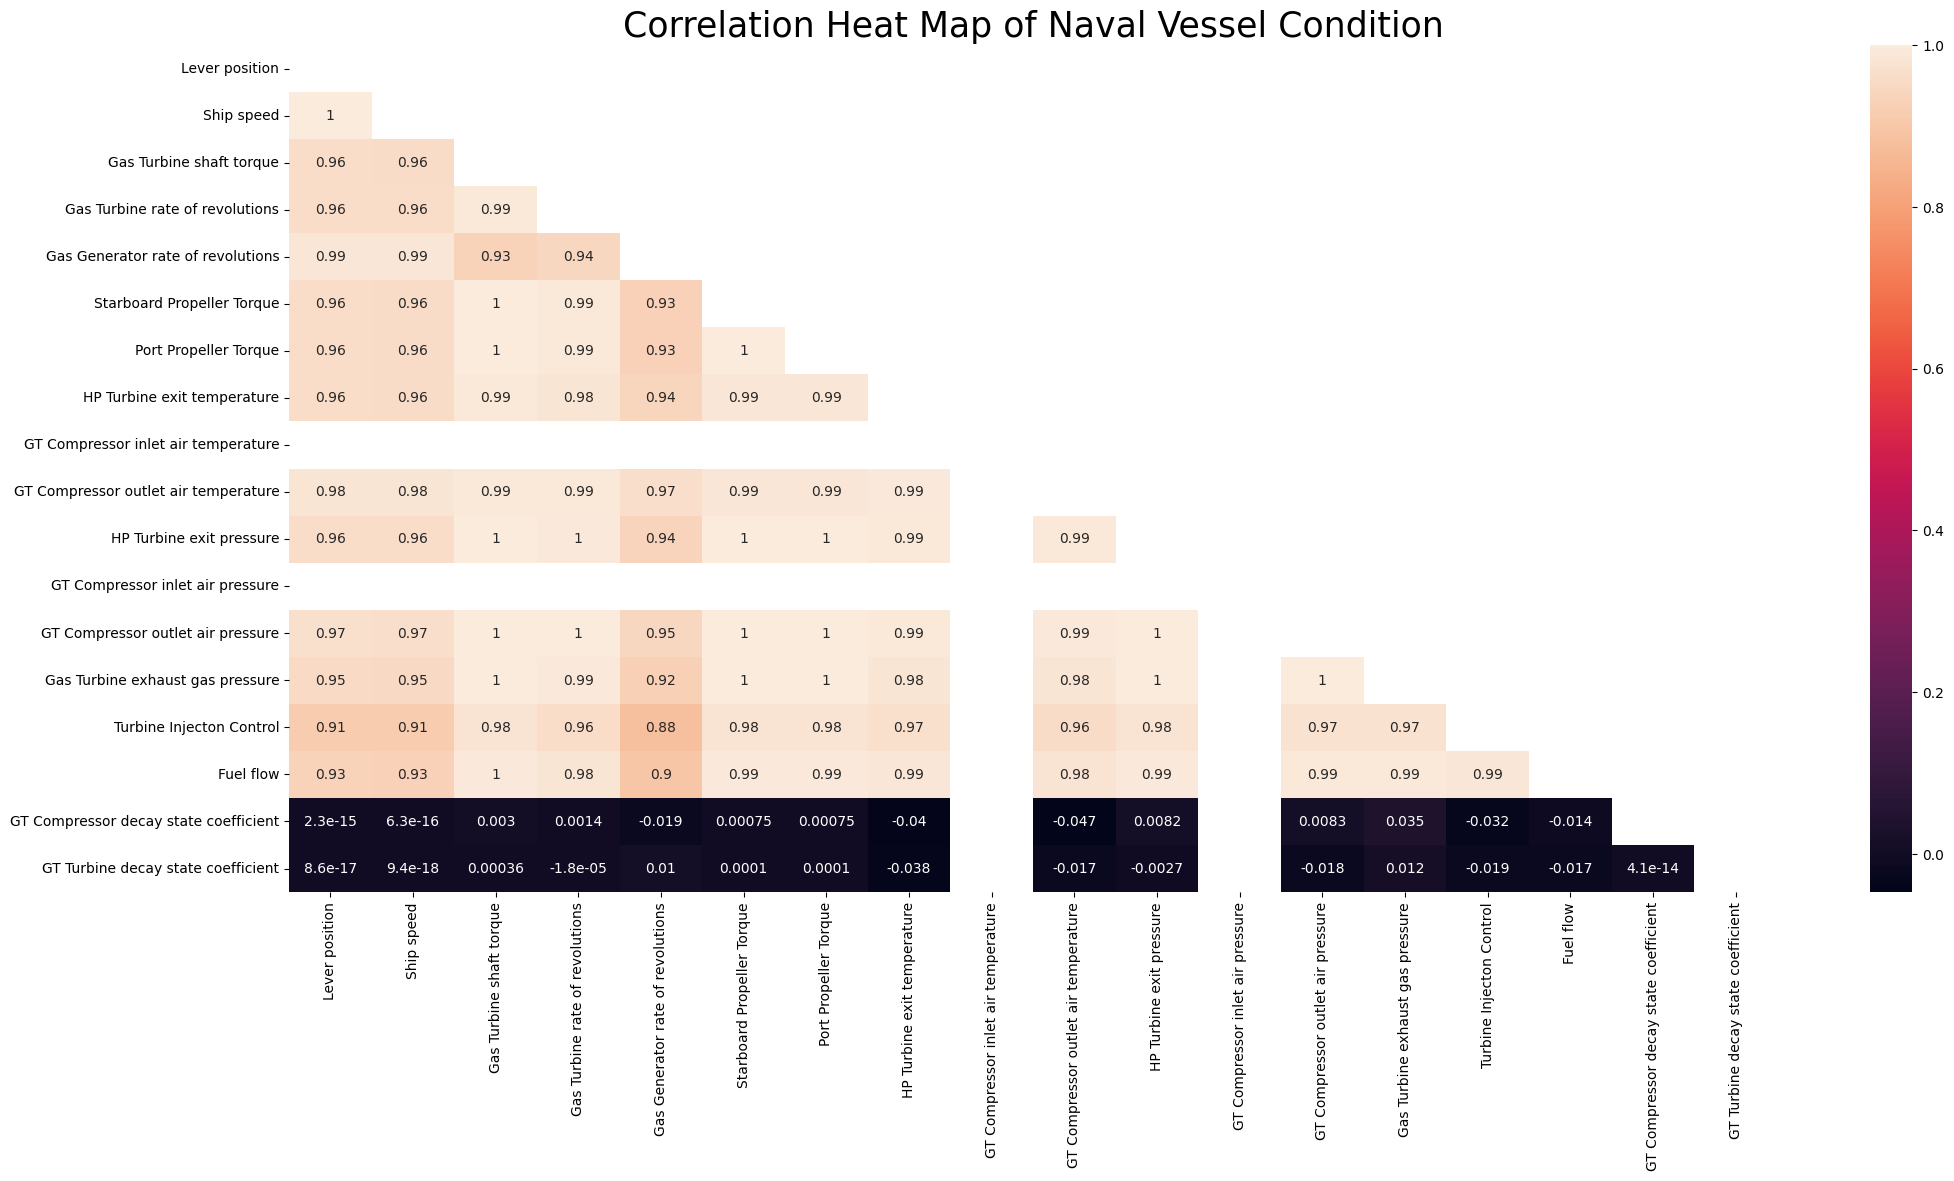

In [ ]:
# Prediction of the stated coefficients(They arent features, hence) using the features 14 available
# Values in each box represent the percentage of correlation with the given two coefficients

fig , axes = plt.subplots(figsize=(24,11))

title = "Correlation Heat Map of Naval Vessel Condition"
plt.title(title, fontsize = 25)

mask = np.triu(np.ones_like(df.corr())) # To remove diagonal Entries as they will be symmetric
sns.heatmap(df.corr(), annot=True, mask=mask, cbar = True, ax= axes)
plt.show()

In [ ]:
for i in range(df.shape[0]):
  if df['Starboard Propeller Torque'][i] != df['Port Propeller Torque'][i]:
    print('Something is unequal!')
    break

# df['Starboard Propeller Torque'][i] & df['Port Propeller Torque'][i] are equal

In [ ]:
# Prediction based on 13 features
X = df.drop(['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient'], axis = 1)
y = df[['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
scaler = StandardScaler()
tr_scaled_features = scaler.fit_transform(X_train)
X_train = pd.DataFrame(tr_scaled_features, index=X_train.index, columns=X_train.columns)

tt_scaled_features = scaler.fit_transform(X_test)
X_test = pd.DataFrame(tt_scaled_features, index=X_test.index, columns=X_test.columns)

In [ ]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully!")

Scaler saved successfully!


In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lm.predict(X_test)

In [ ]:
dataset_file = f"{main_dir}simulated_csv.csv"
df = pd.read_csv(dataset_file)
# X_test = df
# new_data_scaled = loaded_scaler.transform(df)
# predictions = loaded_naval_model.predict(new_data_scaled)

df = scaler.fit_transform(df)
df = lm.predict(df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(df)

[[0.96134175 0.98413151]
 [0.96637176 0.98105343]
 [0.95601763 0.98149482]
 ...
 [0.99203791 0.97763428]
 [0.98407868 0.99536347]
 [0.9532585  0.94356021]]


In [ ]:
df.shape

(23867, 2)

In [ ]:
print('Coeffiecients: \n',lm.coef_)

Coeffiecients: 
 [[ 0.68235586 -0.5901314  -0.00705797 -0.02260558  0.03421288 -0.11233679
  -0.11233679 -0.00087632 -0.24588807  0.19950525  0.07539743  0.00813303
  -0.01871605  0.11237241]
 [ 0.00452084  0.04389322  0.30567747  0.0507833   0.03441388 -0.1588129
  -0.1588129  -0.11852812  0.01305027  0.08886265 -0.28658308  0.00928653
  -0.0062292   0.18237266]]


In [ ]:
coeffecients = pd.DataFrame(lm.coef_.T, index=X.columns) # Transpose lm.coef_ to align with X.columns
coeffecients.columns = ['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient'] # Set appropriate column names
coeffecients

,GT Compressor decay state coefficient,GT Turbine decay state coefficient
Lever position,0.682356,0.004521
Ship speed,-0.590131,0.043893
Gas Turbine shaft torque,-0.007058,0.305677
Gas Turbine rate of revolutions,-0.022606,0.050783
Gas Generator rate of revolutions,0.034213,0.034414
Starboard Propeller Torque,-0.112337,-0.158813
Port Propeller Torque,-0.112337,-0.158813
HP Turbine exit temperature,-0.000876,-0.118528
GT Compressor outlet air temperature,-0.245888,0.013050
HP Turbine exit pressure,0.199505,0.088863


In [ ]:
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R2 score:', metrics.r2_score(y_test, pred))

RMSE: 0.004396441537569697
R2 score: 0.8760441460678159


Text(0, 0.5, 'Predicted Y')

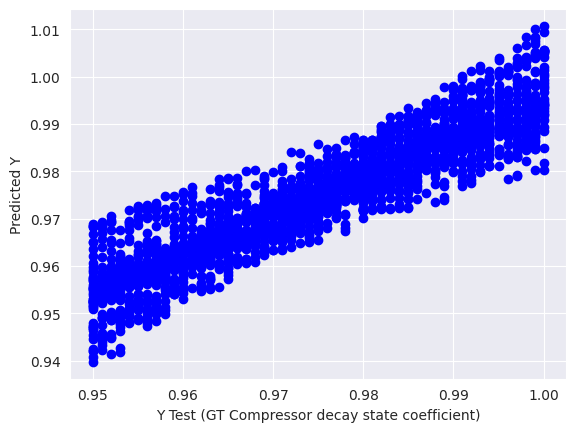

In [ ]:
sns.set_style('darkgrid')
pred_compressor = pred[:, 0]
plt.scatter(y_test['GT Compressor decay state coefficient'],pred_compressor,c='blue')
plt.xlabel('Y Test (GT Compressor decay state coefficient)')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

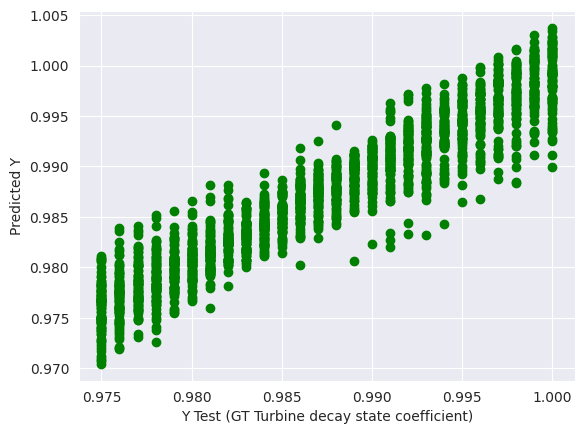

In [ ]:
# prompt: Generate similar code above to plot for the 2nd coefficient

pred_turbine = pred[:, 1]
plt.scatter(y_test['GT Turbine decay state coefficient'],pred_turbine,c='green')
plt.xlabel('Y Test (GT Turbine decay state coefficient)')
plt.ylabel('Predicted Y')

In [ ]:
with open("naval_model.pkl", "wb") as file:
    pickle.dump(lm, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
def load_and_preprocess_data(file_paths):
  data = pd.read_csv(f"{file_paths}/naval_plant_maintenance.csv",delim_whitespace=True, header=None)
  features = ['Lever position','Ship speed', 'Gas Turbine shaft torque', 'Gas Turbine rate of revolutions', 'Gas Generator rate of revolutions', 'Starboard Propeller Torque', 'Port Propeller Torque',\
             'HP Turbine exit temperature', 'GT Compressor inlet air temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure', 'GT Compressor inlet air pressure', 'GT Compressor outlet air pressure',\
             'Gas Turbine exhaust gas pressure', 'Turbine Injecton Control', 'Fuel flow', 'GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']
  data.columns = features
  data = data.drop(['GT Compressor inlet air temperature','GT Compressor inlet air pressure','GT Compressor decay state coefficient', 'GT Turbine decay state coefficient'],axis=1)
  return data

In [ ]:
def naval_test():
  data = f"/content/drive/My Drive/NIT-Trichy/"
  df = load_and_preprocess_data(data)

  model = f"/content/drive/My Drive/NIT-Trichy/naval_model.pkl"
  scaler = f"/content/drive/My Drive/NIT-Trichy/scaler.pkl"

  # Load the scaler
  with open(scaler, 'rb') as file:
      loaded_scaler = pickle.load(file)

  # Load the nn_model
  with open(model, 'rb') as file:
      loaded_naval_model = pickle.load(file)

  print(df.columns)

  noise_std = 0.05
  numeric_cols = df.select_dtypes(include=[np.number]).columns
  noisy_df = df.copy()
  noisy_df[numeric_cols] += np.random.normal(loc=0, scale=noise_std, size=noisy_df[numeric_cols].shape)
  augmented_df = pd.concat([df, noisy_df], ignore_index=True)

  new_df_scaled = loaded_scaler.transform(augmented_df)
  predictions = loaded_naval_model.predict(new_df_scaled)
  return predictions

In [ ]:
predictions = naval_test()

<ipython-input-81-028bc192ea9b>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f"{file_paths}/naval_plant_maintenance.csv",delim_whitespace=True, header=None)


Index(['Lever position', 'Ship speed', 'Gas Turbine shaft torque',
       'Gas Turbine rate of revolutions', 'Gas Generator rate of revolutions',
       'Starboard Propeller Torque', 'Port Propeller Torque',
       'HP Turbine exit temperature', 'GT Compressor outlet air temperature',
       'HP Turbine exit pressure', 'GT Compressor outlet air pressure',
       'Gas Turbine exhaust gas pressure', 'Turbine Injecton Control',
       'Fuel flow'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(predictions.shape)

(23868, 2)


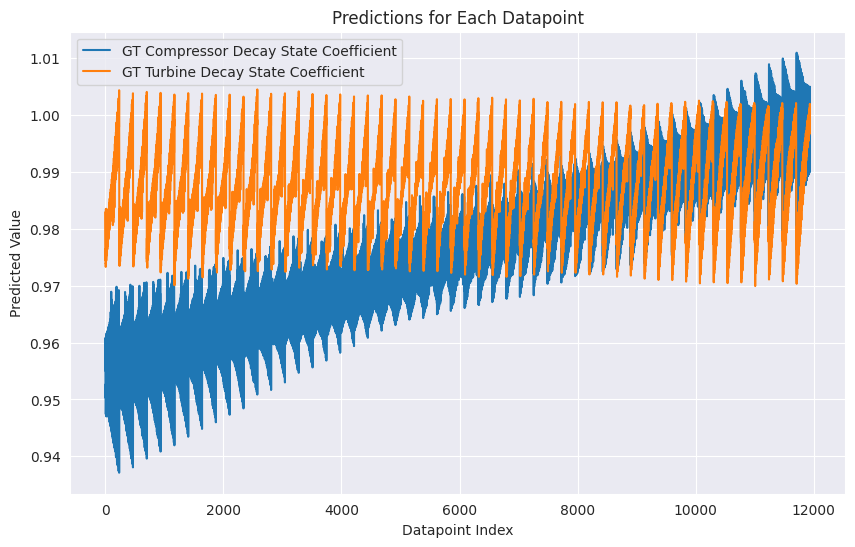

In [ ]:
# prompt: Plot the predictions  for each datapoint from 1 to the length of the datashape

import matplotlib.pyplot as plt

# Assuming 'predictions' is already defined from the previous code
# and has the shape (n_samples, 2) where n_samples is the number of datapoints

plt.figure(figsize=(10, 6))
plt.plot(range(1, predictions.shape[0] + 1), predictions[:, 0], label='GT Compressor Decay State Coefficient')
plt.plot(range(1, predictions.shape[0] + 1), predictions[:, 1], label='GT Turbine Decay State Coefficient')
plt.xlabel('Datapoint Index')
plt.ylabel('Predicted Value')
plt.title('Predictions for Each Datapoint')
plt.legend()
plt.grid(True)
plt.show()


LSTM

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
main_dir = "/content/drive/My Drive/NIT-Trichy/"
# dataset_file = f"{main_dir}data.txt"
dataset_file = f"{main_dir}navalplantmaintenance.csv"
df = pd.read_csv(dataset_file,delim_whitespace=True, header=None)

<ipython-input-88-d185f3f059fc>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(dataset_file,delim_whitespace=True, header=None)


In [ ]:
features = ['Lever position','Ship speed', 'Gas Turbine shaft torque', 'Gas Turbine rate of revolutions',
            'Gas Generator rate of revolutions', 'Starboard Propeller Torque', 'Port Propeller Torque',
            'HP Turbine exit temperature', 'GT Compressor inlet air temperature',
            'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
            'GT Compressor inlet air pressure', 'GT Compressor outlet air pressure',
            'Gas Turbine exhaust gas pressure', 'Turbine Injecton Control', 'Fuel flow']

targets = ['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']

In [ ]:
col_names = ['Lever position','Ship speed', 'Gas Turbine shaft torque', 'Gas Turbine rate of revolutions', 'Gas Generator rate of revolutions', 'Starboard Propeller Torque', 'Port Propeller Torque',\
             'HP Turbine exit temperature', 'GT Compressor inlet air temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure', 'GT Compressor inlet air pressure', 'GT Compressor outlet air pressure',\
             'Gas Turbine exhaust gas pressure', 'Turbine Injecton Control', 'Fuel flow', 'GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']
# GT => Gas Turbine
df.columns = col_names
df.head()

,Lever position,Ship speed,Gas Turbine shaft torque,Gas Turbine rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,HP Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,Gas Turbine exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
X = df.drop(['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient'], axis = 1)
y = df[['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(df[features])
y = scaler_y.fit_transform(df[targets])

# Reshape for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], 1, X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])),
    LSTM(50, activation='relu', return_sequences=False),
    Dense(25, activation='relu'),
    Dense(2)  # Predicting two values
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


597/597 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1433
Epoch 2/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0873
Epoch 3/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0810
Epoch 4/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0629
Epoch 5/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0518
Epoch 6/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0478
Epoch 7/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0461
Epoch 8/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0441
Epoch 9/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0413
Epoch 10/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0348
Epoch 11/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0248
Epoch 12/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0162
Epoch 13/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0120
Epoch 14/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0094
Epoch 15/20
597/597 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0084


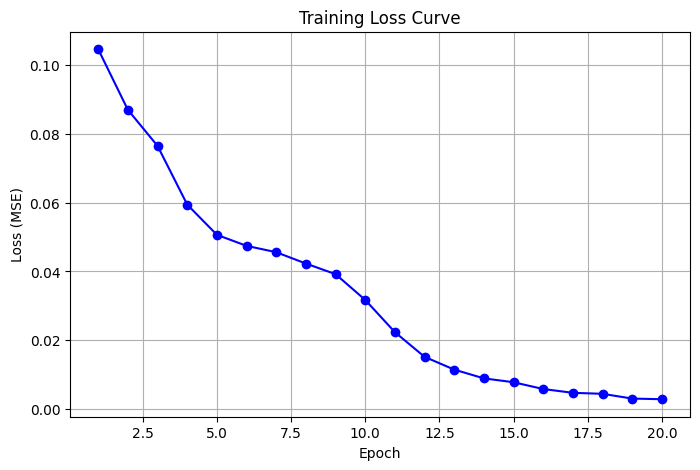

In [ ]:
import matplotlib.pyplot as plt
# history = model.fit(X, y, epochs=50, batch_size=16, verbose=1) # Assign the training history to 'history'
# Extract training loss values
loss_values = history.history['loss']

# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), loss_values, marker='o', linestyle='-', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, model.predict(X_test))
print(f"Mean Absolute Error (MAE): {mae:.4f}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Mean Absolute Error (MAE): 0.0331


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, model.predict(X_test))
print(f"Mean Squared Error (MSE): {mse:.4f}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error (MSE): 0.0018


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, model.predict(X_test))
print(f"R² Score: {r2:.4f}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R² Score: 0.9802


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


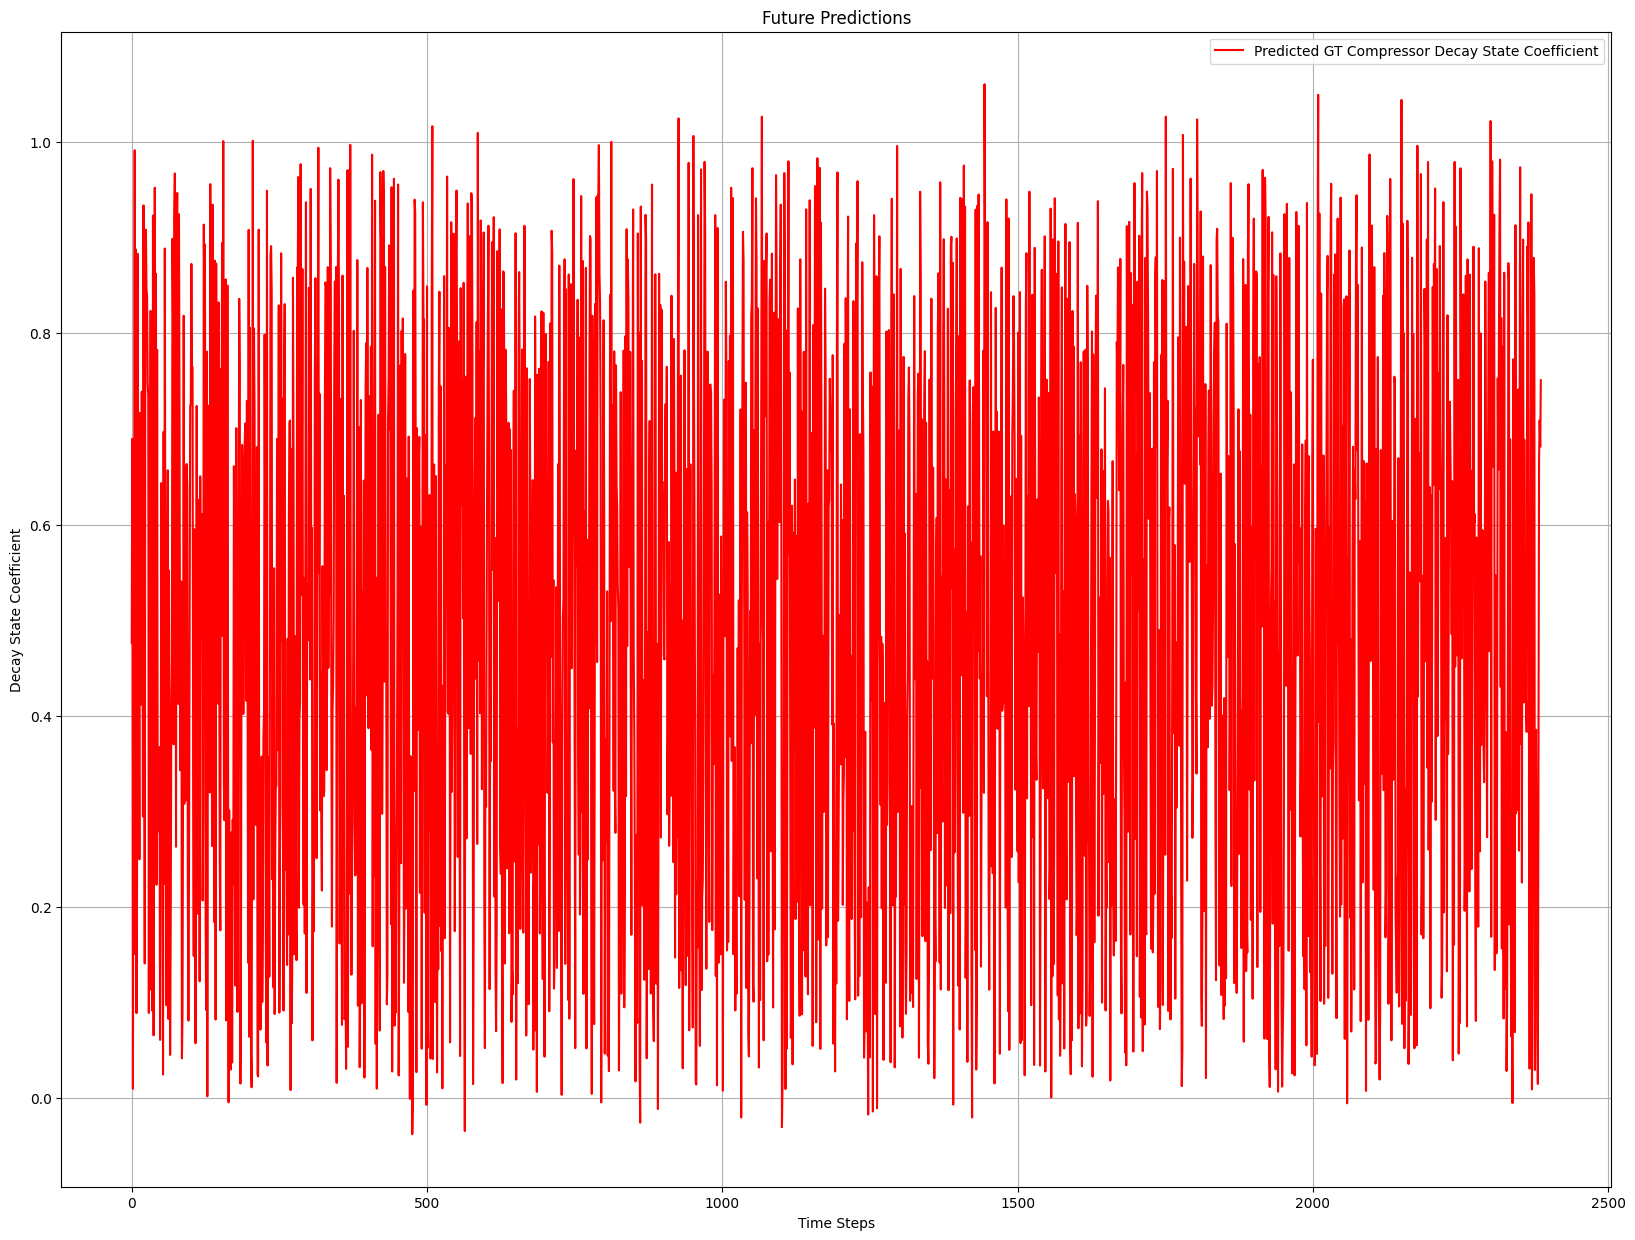

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test contains the last sequence of input features
y_pred = model.predict(X_test)  # Predict future values

# Extract actual values for comparison
y_actual = y_test  # Assuming y_test holds actual future values

# Plot actual vs predicted values
plt.figure(figsize=(20, 15))
# plt.plot(y_actual[:, 0], label="Actual GT Compressor Decay State Coefficient", color='blue', linestyle='dashed')
plt.plot(y_pred[:, 0], label="Predicted GT Compressor Decay State Coefficient", color='red')

# plt.plot(y_actual[:, 1], label="Actual GT Turbine Decay State Coefficient", color='green', linestyle='dashed')
# plt.plot(y_pred[:, 1], label="Predicted GT Turbine Decay State Coefficient", color='orange')

plt.xlabel("Time Steps")
plt.ylabel("Decay State Coefficient")
plt.title("Future Predictions")
plt.legend()
plt.grid(True)
plt.show()


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


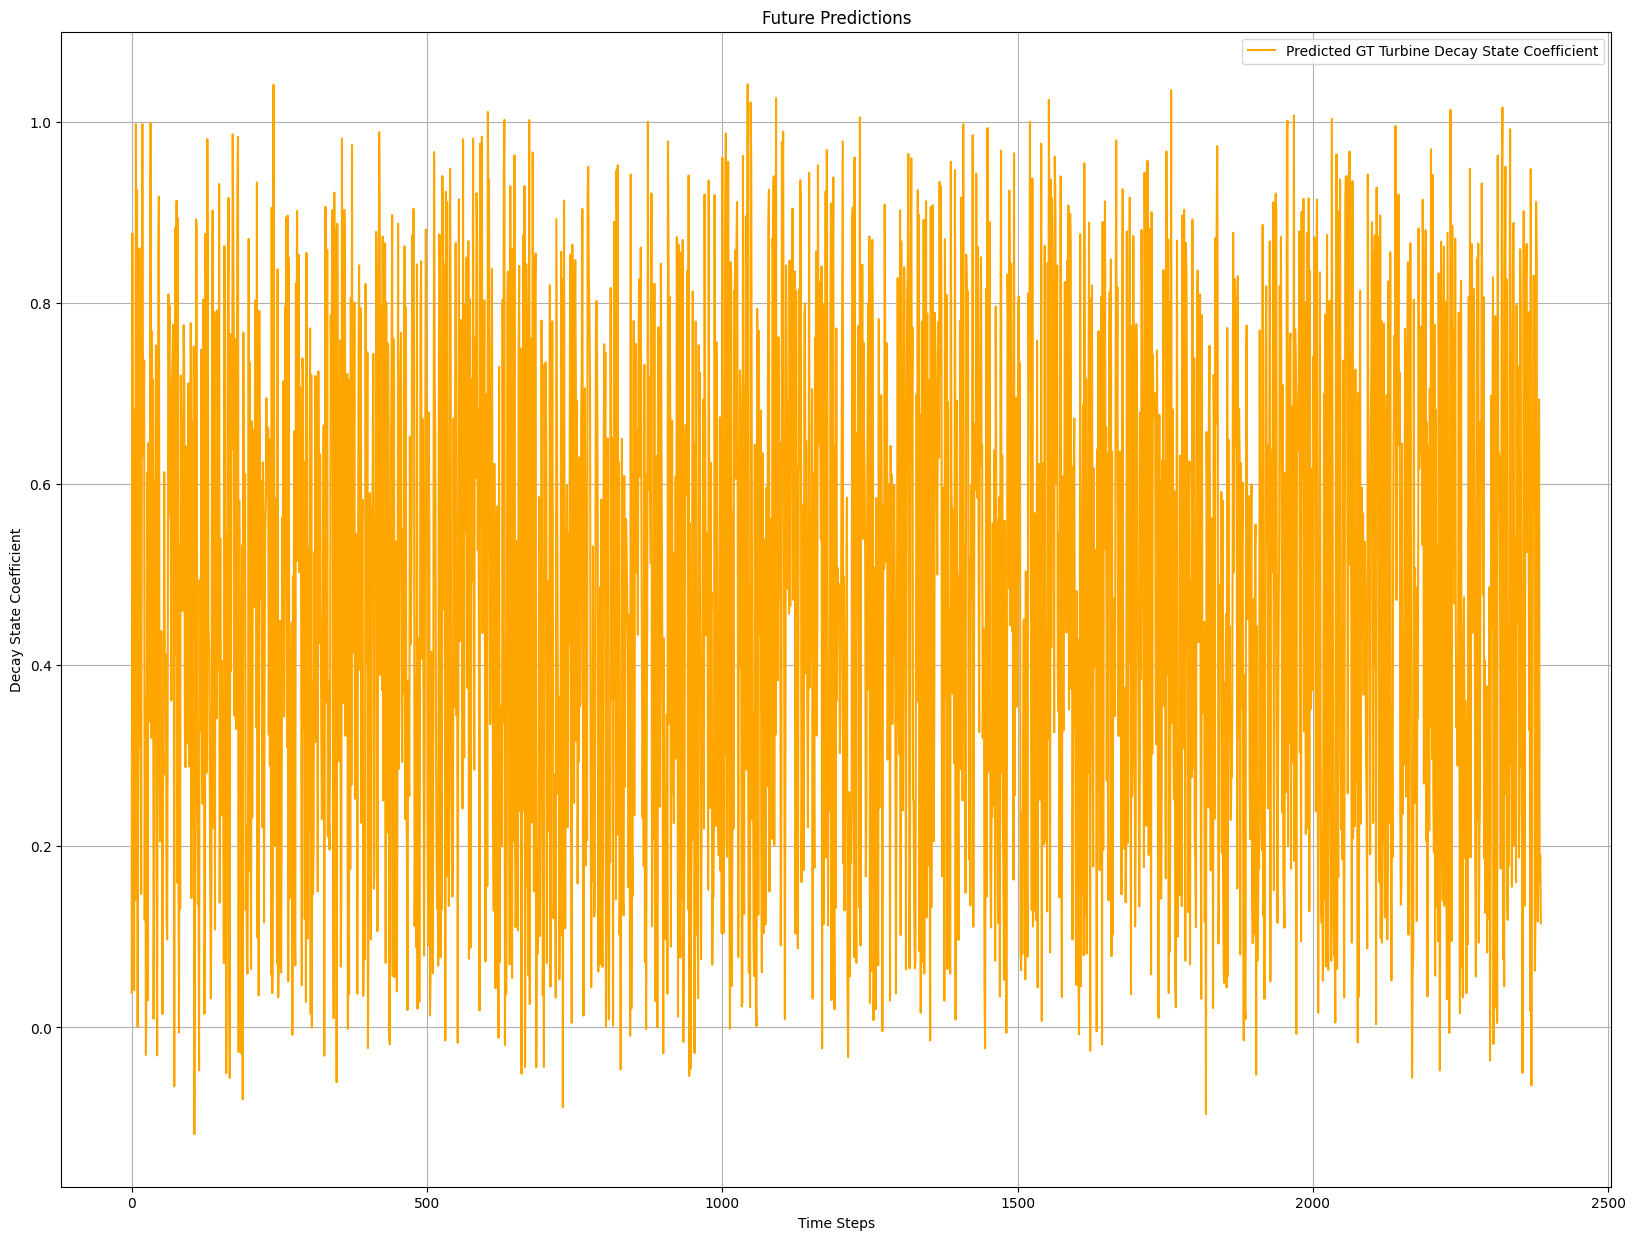

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test contains the last sequence of input features
y_pred = model.predict(X_test)  # Predict future values

# Extract actual values for comparison
y_actual = y_test  # Assuming y_test holds actual future values

# Plot actual vs predicted values
plt.figure(figsize=(20, 15))
# plt.plot(y_actual[:, 0], label="Actual GT Compressor Decay State Coefficient", color='blue', linestyle='dashed')
# plt.plot(y_pred[:, 0], label="Predicted GT Compressor Decay State Coefficient", color='red')

# plt.plot(y_actual[:, 1], label="Actual GT Turbine Decay State Coefficient", color='green', linestyle='dashed')
plt.plot(y_pred[:, 1], label="Predicted GT Turbine Decay State Coefficient", color='orange')

plt.xlabel("Time Steps")
plt.ylabel("Decay State Coefficient")
plt.title("Future Predictions")
plt.legend()
plt.grid(True)
plt.show()


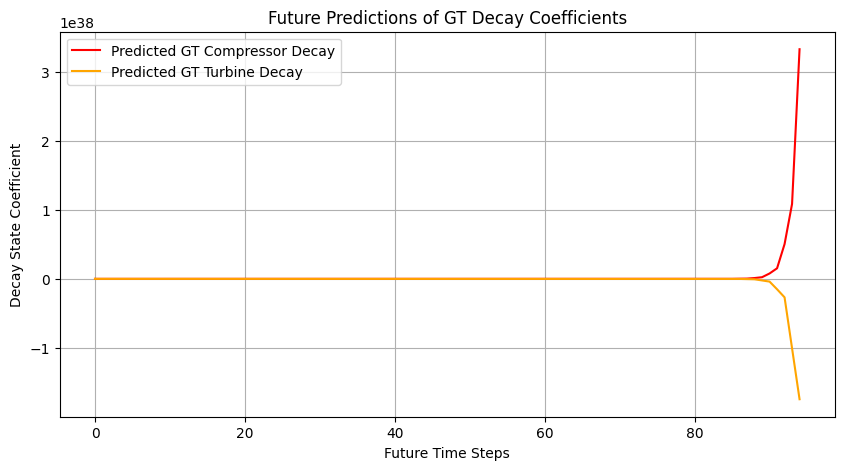

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

future_steps = 1000  # Define how many future steps to predict

# Start with the last input from X_test
last_input = X_test[-1].reshape(1, 1, X_test.shape[2])  # (1, 1, 16)
future_preds = []

for _ in range(future_steps):
    next_pred = model.predict(last_input, verbose=0)  # Predict next step (1,2)
    future_preds.append(next_pred.flatten())  # Store the predicted values

    # Update last input: Shift the sequence and insert the new prediction
    last_input = np.roll(last_input, shift=-2, axis=2)  # Shift features left
    last_input[0, 0, -2:] = next_pred  # Append new prediction at the end

future_preds = np.array(future_preds)  # Convert list to NumPy array

# Plot the future predictions
plt.figure(figsize=(10, 5))
plt.plot(future_preds[:, 0], label="Predicted GT Compressor Decay", color='red')
plt.plot(future_preds[:, 1], label="Predicted GT Turbine Decay", color='orange')

plt.xlabel("Future Time Steps")
plt.ylabel("Decay State Coefficient")
plt.title("Future Predictions of GT Decay Coefficients")
plt.legend()
plt.grid(True)
plt.show()